In [1]:
import os
os.chdir("../")
import rasterio
from rasterio.plot import show, show_hist
from rasterio.warp import calculate_default_transform, reproject, Resampling
import fiona

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
forest_path = os.getcwd() + "/data/raster/forest_loss_porijogi_wgs84.tif"
crop_path = os.getcwd() + "/data/raster/HARV_dsmCrop.tif"

In [3]:
forest = rasterio.open(forest_path)
print(f"profile: {forest.profile}")
forest_src = forest.read(1)

profile: {'driver': 'GTiff', 'dtype': 'int16', 'nodata': 128.0, 'width': 1326, 'height': 687, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0002500000000000014, 0.0, 26.548502689,
       0.0, -0.0002500000000000043, 58.289435726), 'blockysize': 3, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


In [4]:
crop = rasterio.open(crop_path)
print(f"shape: {crop.shape}, count: {crop.count}, crs: {crop.crs}")
crop_src = crop.read(1)

shape: (1367, 1697), count: 1, crs: EPSG:32618


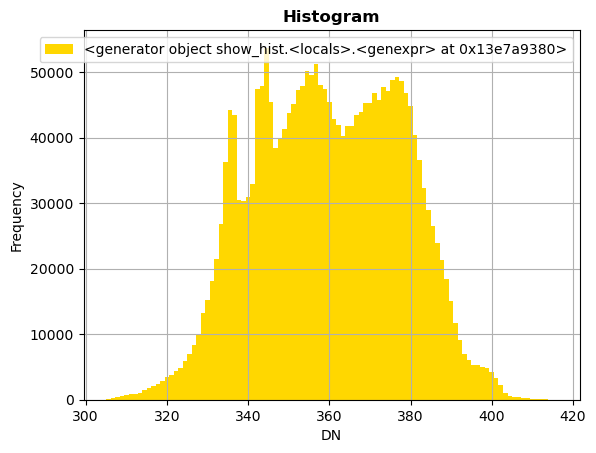

In [6]:
show_hist(crop_src, bins=100);

In [5]:
from rasterio.features import shapes
mask = crop.dataset_mask()
for geom, val in shapes(mask, transform=crop.transform):
    geom = rasterio.warp.transform_geom(crop.crs,
                                        'EPSG:4326',
                                        geom,
                                        precision=6)
    print(geom)

{'type': 'Polygon', 'coordinates': [[[-72.181309, 42.542273], [-72.181863, 42.529977], [-72.161225, 42.529467], [-72.160667, 42.541763], [-72.181309, 42.542273]]]}
